In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.preprocessing
import pyclustertend 
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from ast import literal_eval

from scipy.spatial import distance
from scipy.spatial.distance import pdist, squareform


# np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

In [2]:
# Global Variables
seed = random.seed(123)

# Analisis Exploratorio

In [3]:
# Variable classification
data = pd.read_csv('./data.csv', encoding = "ISO-8859-1")
data = data.drop('index', axis=1)
data['dll'] = data['dll'].apply(literal_eval)
data['functions'] = data['functions'].apply(literal_eval)
data = data.explode('dll')
data = data.explode('functions')

In [4]:
data.head()

,filename,sections,dll,functions,date
0,RTC_7F85D7F628CE62D1D8F7B39D8940472,"[['IMAGE_SECTION_HEADER', '0x1000', '0x1ef000'...",KERNEL32.DLL,LoadLibraryA,Mon May 30 08:29:29 2011 UTC
0,RTC_7F85D7F628CE62D1D8F7B39D8940472,"[['IMAGE_SECTION_HEADER', '0x1000', '0x1ef000'...",KERNEL32.DLL,ExitProcess,Mon May 30 08:29:29 2011 UTC
0,RTC_7F85D7F628CE62D1D8F7B39D8940472,"[['IMAGE_SECTION_HEADER', '0x1000', '0x1ef000'...",KERNEL32.DLL,GetProcAddress,Mon May 30 08:29:29 2011 UTC
0,RTC_7F85D7F628CE62D1D8F7B39D8940472,"[['IMAGE_SECTION_HEADER', '0x1000', '0x1ef000'...",KERNEL32.DLL,VirtualProtect,Mon May 30 08:29:29 2011 UTC
0,RTC_7F85D7F628CE62D1D8F7B39D8940472,"[['IMAGE_SECTION_HEADER', '0x1000', '0x1ef000'...",KERNEL32.DLL,_iob,Mon May 30 08:29:29 2011 UTC


In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

y = label_encoder.fit_transform(data["functions"].to_list())

data["functions encoded"]= y


y = label_encoder.fit_transform(data["dll"].to_list())
data["dll encoded"]= y



# Graficas de barras

                                        name  count
0      KLp90_6D5C8FC4B14559F73B6136D85B94198    595
1        SAM_B659D71AE168E774FAAF38DB30F4A84    595
2       DS22_A670D13D4D014169C4080328B8FEB86    595
3       NV99_C9C9DBF388A8D81D8CFB4D3FC05F8E4    595
4      POL55_A4F1ECC4D25B33395196B5D51A06790    595
5      GBV66_8F259BB36E00D124963CFA9B86F502E    595
6        K99_C3A9A7B026BFE0E55FF219FD6AA7D94    595
7       GFT4_7DDD3D72EAD03C7518F5D47650C8572    510
8     VC990_468FF2C12CFFC7E5B2FE0EE6BB3B239E    108
9    TG78Z__727A6800991EEAD454E53E8AF164A99C    108
10     B98hX8E8622C393D7E832D39E620EAD5D3B49     88
11     AL65_DB05DF0498B59B42A8E493CF3C10C578     80
12   FGTR43_EF8E0FB20E7228C7492CCDC59D87C690     80
13      QW2_4C6BDDCCA2695D6202DF38708E14FC7E     80
14     PL98_BD8B082B7711BC980252F988BB0CA936     80
15     AAAz2E1B6940985A23E5639450F8391820655     80
16      L11_1415EB8519D13328091CC5C76A624E3D     40
17  FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2     40
18          

<Figure size 1440x360 with 0 Axes>

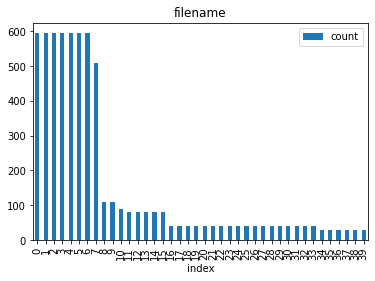

                                                 name  count
0   [['IMAGE_SECTION_HEADER', '0x1000', '0x25ca', ...   2380
1   [['IMAGE_SECTION_HEADER', '0x1000', '0x25da', ...   1190
2   [['IMAGE_SECTION_HEADER', '0x1000', '0x5000', ...    600
3   [['IMAGE_SECTION_HEADER', '0x1000', '0x25da', ...    595
4   [['IMAGE_SECTION_HEADER', '0x1000', '0x248a', ...    510
5   [['IMAGE_SECTION_HEADER', '0x1000', '0x70000',...    240
6   [['IMAGE_SECTION_HEADER', '0x1000', '0x68000',...    216
7   [['IMAGE_SECTION_HEADER', '0x1000', '0x5000', ...    168
8   [['IMAGE_SECTION_HEADER', '0x1000', '0x5f000',...    160
9   [['IMAGE_SECTION_HEADER', '0x1000', '0x1ef000'...    120
10  [['IMAGE_SECTION_HEADER', '0x1000', '0x50000',...     88


<Figure size 1440x360 with 0 Axes>

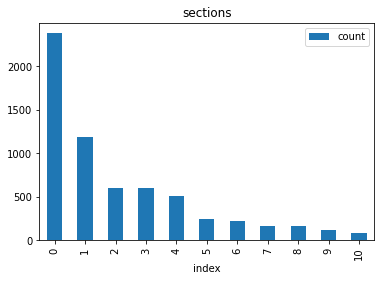

            name  count
0     WS2_32.dll    951
1     MSVCRT.dll    951
2     USER32.dll    927
3   ADVAPI32.dll    765
4    SHELL32.dll    739
5    WININET.dll    704
6   KERNEL32.dll    680
7   KERNEL32.DLL    271
8      GDI32.dll     85
9   NETAPI32.dll     85
10     PSAPI.DLL     55
11     ntdll.dll     54


<Figure size 1440x360 with 0 Axes>

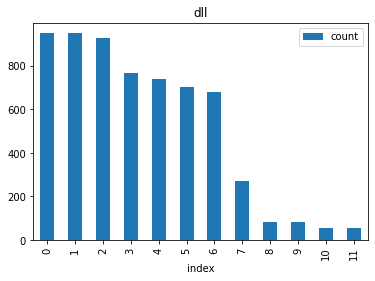

                            name  count
0                   LoadLibraryA    180
1                 GetProcAddress    180
2                 VirtualProtect    180
3                           atol    154
4                    ExitProcess    140
..                           ...    ...
112        ChangeServiceConfig2A      6
113           CloseServiceHandle      6
114                    CopyFileA      6
115  StartServiceCtrlDispatcherA      6
116           QueryServiceStatus      6

[117 rows x 2 columns]


<Figure size 1440x360 with 0 Axes>

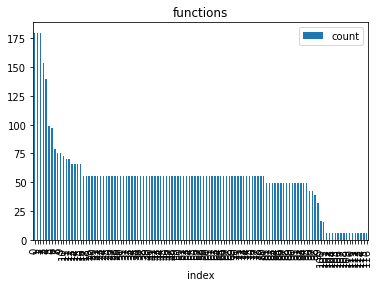

                            name  count
0   Tue Sep 28 08:09:41 2010 UTC   2380
1   Fri Jul 29 07:10:31 2011 UTC    595
2   Tue Aug  9 08:15:29 2011 UTC    595
3   Thu Aug 11 13:15:49 2011 UTC    595
4   Fri Aug 19 03:07:37 2011 UTC    510
5   Thu May 14 17:12:40 2009 UTC    480
6   Tue Jan 11 03:22:02 2011 UTC    216
7   Fri Jan 15 17:20:56 2010 UTC    168
8   Wed Oct 19 09:19:09 2011 UTC    160
9   Sun Nov 18 23:50:13 2007 UTC    120
10  Mon May 30 08:29:29 2011 UTC    120
11  Tue Apr 20 03:39:27 2010 UTC     88
12  Tue Feb  9 08:29:43 2010 UTC     80
13  Wed Feb  3 08:22:33 2010 UTC     80
14  Wed Oct 19 09:16:10 2011 UTC     80


<Figure size 1440x360 with 0 Axes>

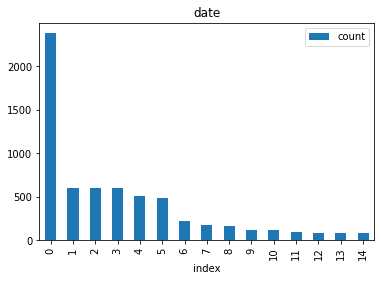

     name  count
0      62    180
1      21    180
2      37    180
3      87    154
4      12    140
..    ...    ...
112    18      6
113   101      6
114    61      6
115    45      6
116    60      6

[117 rows x 2 columns]


<Figure size 1440x360 with 0 Axes>

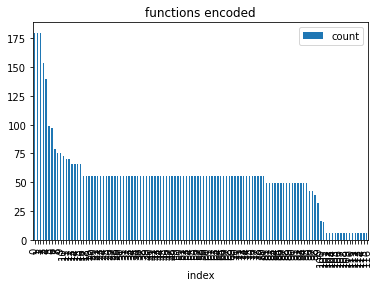

    name  count
0     10    951
1      4    951
2      8    927
3      0    765
4      7    739
5      9    704
6      3    680
7      2    271
8      5     85
9      1     85
10     6     55
11    11     54


<Figure size 1440x360 with 0 Axes>

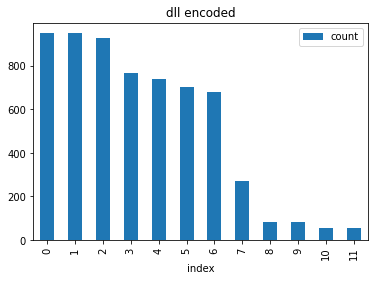

In [6]:
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 35}

# plt.rc('font', **font)

for var in data.columns:
  plt.figure(figsize=(20,5))

  sf=data[var].value_counts()
  labels = pd.DataFrame({'name':sf.index, 'count':sf.values})
  labels['index'] = labels.index

  labels.plot(x="index", y=["count"], kind="bar")
  print(labels[["name", "count"]])
  plt.title(var)
  plt.show()

# Quantitative data

In [7]:
quantitative_df = data[["dll encoded", "functions encoded"]]
columns = ["dll", "functions"]

In [8]:
X_scale=sklearn.preprocessing.scale(quantitative_df)
pyclustertend.hopkins(X_scale, len(X_scale))

0.0059302228653841235

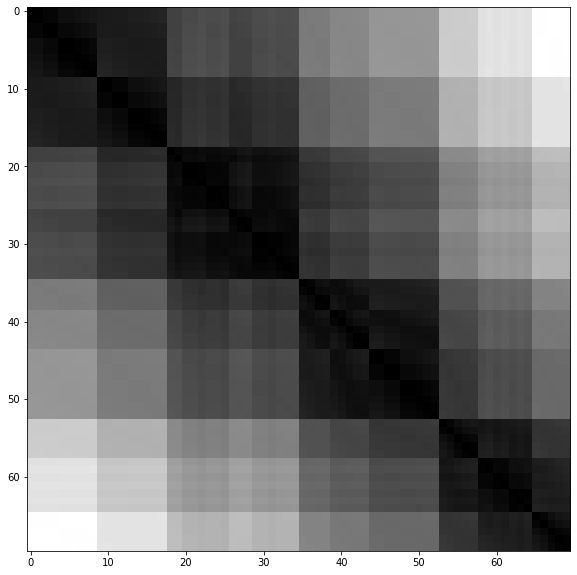

In [9]:
pyclustertend.vat(quantitative_df[:70])

# Grafica codo

Inertia con i  1    valor  12534.000000000005
Inertia con i  2    valor  7388.617663048713
Inertia con i  3    valor  4544.338479957387
Inertia con i  4    valor  2535.5512378874255
Inertia con i  5    valor  2135.52039243014


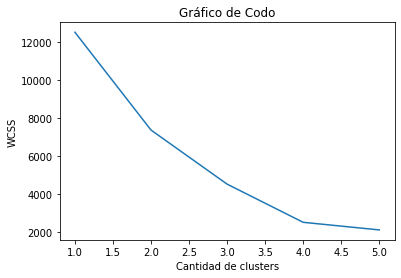

In [10]:
numeroClusters = range(1,6)

wcss = []
# Obtenemos 10 posibles clusters
for i in numeroClusters:
    # Se calcula la kmean con esa cantidad de clusters
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(X_scale)
    # Obtenemos la inercia
    wcss.append(kmeans.inertia_)
    print("Inertia con i ", i, "   valor ", kmeans.inertia_)

# Graficando
plt.plot(numeroClusters, wcss)
plt.xlabel("Cantidad de clusters")
plt.ylabel("WCSS")
plt.title("Gráfico de Codo")
plt.show()

# Construyendo modelo

In [11]:
number_clusters = 4

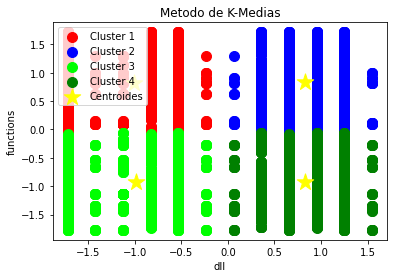

In [12]:
kmeans_cluster = KMeans(n_clusters=number_clusters, max_iter=3)
kmeans_cluster.fit(X_scale)
kmeans_result = kmeans_cluster.predict(X_scale)

# Plot
plt.scatter(X_scale[kmeans_result == 0, 0], X_scale[kmeans_result == 0, 1], s = 100, c = 'red', label = "Cluster 1")
plt.scatter(X_scale[kmeans_result == 1, 0], X_scale[kmeans_result == 1, 1], s = 100, c = 'blue', label = "Cluster 2")
plt.scatter(X_scale[kmeans_result == 2, 0], X_scale[kmeans_result == 2, 1], s = 100, c = 'lime', label = "Cluster 3")
plt.scatter(X_scale[kmeans_result == 3, 0], X_scale[kmeans_result == 3, 1], s = 100, c = 'green', label = "Cluster 4")



plt.scatter(kmeans_cluster.cluster_centers_[:,0], kmeans_cluster.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.title("Metodo de K-Medias")

plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.legend()
plt.show()

In [13]:
data['Cluster'] = kmeans_result

# Silhouette

For n_clusters = 4 The average silhouette_score of K-Means is: 0.49419736850584384


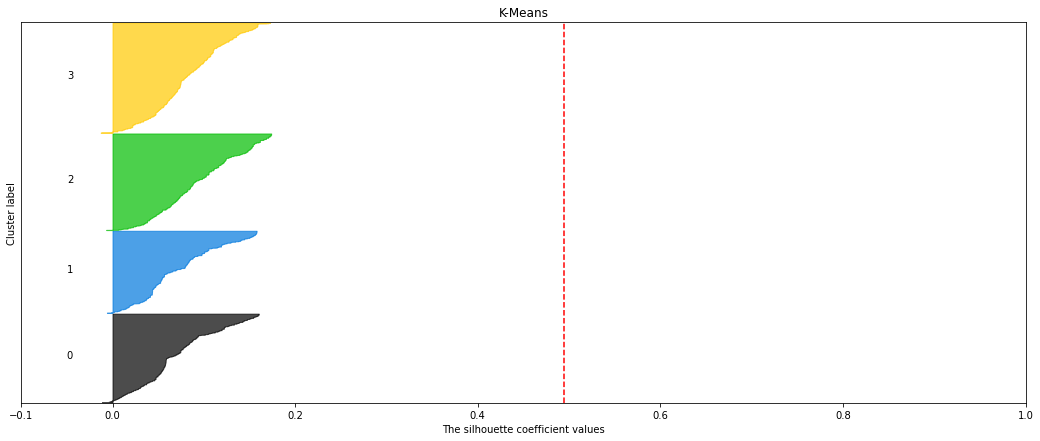

In [14]:
def make_silhouette(clusterer, n_clusters, label):
    fig, ax = plt.subplots(figsize=(1,1))
    fig.set_size_inches(18, 7)

    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X_scale) + (n_clusters + 1) * 10])

    cluster_labels = clusterer.fit_predict(X_scale)

    silhouette_avg = silhouette_score(X_scale, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score of",
        label,
        'is:',
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(quantitative_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title(label)
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([]) 
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

make_silhouette(kmeans_cluster, number_clusters, 'K-Means')
plt.show()

# Jaccard

In [15]:
quantitative_variables = ["dll encoded", "functions encoded"]

for i in range(number_clusters):
    print("Cluster num: ", i)
    cluster = data[data["Cluster"] == i]

    res = distance.jaccard(cluster[quantitative_variables[0]], cluster[quantitative_variables[1]])
    print("Jaccard distance: ", res)

    res = 1 - pdist(cluster[[quantitative_variables[0], quantitative_variables[1]]], 'jaccard')
    dist = squareform(res)
    print("Matrix 2D: ")
    print(dist)
    print("\n\n")

Cluster num:  0
Jaccard distance:  1.0
Matrix 2D: 
[[0.  0.5 0.5 ... 0.5 0.  0. ]
 [0.5 0.  0.5 ... 0.  0.5 0. ]
 [0.5 0.5 0.  ... 0.  0.  0. ]
 ...
 [0.5 0.  0.  ... 0.  0.5 0.5]
 [0.  0.5 0.  ... 0.5 0.  0.5]
 [0.  0.  0.  ... 0.5 0.5 0. ]]



Cluster num:  1
Jaccard distance:  1.0
Matrix 2D: 
[[0.  0.5 0.5 ... 0.5 0.  0. ]
 [0.5 0.  0.5 ... 0.  0.5 0. ]
 [0.5 0.5 0.  ... 0.  0.  0. ]
 ...
 [0.5 0.  0.  ... 0.  0.5 0.5]
 [0.  0.5 0.  ... 0.5 0.  0.5]
 [0.  0.  0.  ... 0.5 0.5 0. ]]



Cluster num:  2
Jaccard distance:  0.9985272459499264
Matrix 2D: 
[[0.  0.5 0.5 ... 0.  0.  0. ]
 [0.5 0.  0.5 ... 0.  0.  0. ]
 [0.5 0.5 0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.5 0.5]
 [0.  0.  0.  ... 0.5 0.  0.5]
 [0.  0.  0.  ... 0.5 0.5 0. ]]



Cluster num:  3
Jaccard distance:  0.9838006230529595
Matrix 2D: 
[[0.  0.5 0.5 ... 0.  0.  0. ]
 [0.5 0.  0.5 ... 0.  0.  0. ]
 [0.5 0.5 0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.5 0.5]
 [0.  0.  0.  ... 0.5 0.  0.5]
 [0.  0.  0.  ... 0.5